In [1]:
import matplotlib.pyplot as plt

import pandas as pd


# load data
df = pd.read_csv('../../../data/final-2.csv')
df['Date']= pd.to_datetime(df['Date'])

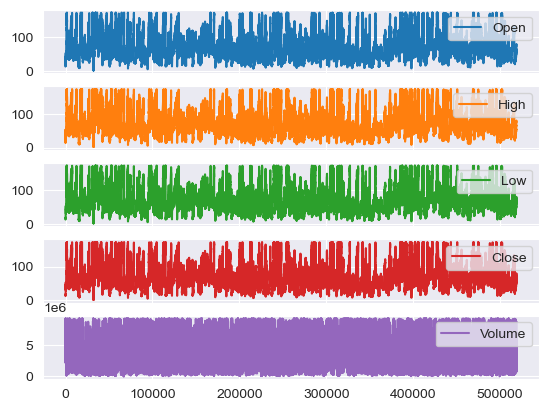

In [2]:
df.drop('Date',axis=1).plot(subplots=True)
plt.show()

In [2]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('../../../data/final-2.csv')

# Ensure data is sorted by date and aggregate 'Close' values by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date')['Close'].mean().reset_index()

# Set date as index again
df = df.sort_values('Date').set_index('Date')

# Set the frequency of dataframe
df = df.asfreq('B')

# Forward fill any NaN values
df = df.ffill()

# We'll use the 'Close' column for our forecast
df = pd.DataFrame(df, columns=['Close'])

# Split the data into train and test
train_data = df[:int(0.7*(len(df)))]
test_data = df[int(0.7*(len(df))):]

# Run auto_arima to determine best parameters
model_auto = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
print(model_auto.summary())

# ARIMA Model
model = ARIMA(train_data, order=model_auto.order)
model_fit = model.fit()

# Forecast
forecast_result = model_fit.forecast(steps=len(test_data))

# Extract the forecast values only
forecast = forecast_result.values

# Compute the mean squared error
mse = mean_squared_error(test_data, forecast)
print('Test MSE: %.3f' % mse)

# Print AIC and BIC
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1908.617, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2071.130, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1962.179, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1926.411, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2069.723, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1914.995, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1913.535, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1909.863, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1909.618, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1915.136, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1907.625, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1908.341, Time=0.27 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1909.621, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1919.716, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept